In [232]:
import numpy as np

b_0=0.23224484198446083, b_1=0.4567112856042504


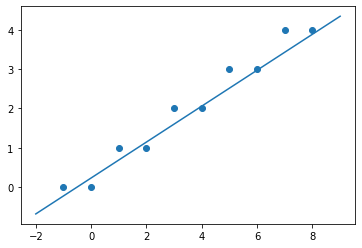

In [233]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

def grad_batch(f, batch_size):
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        batch = set(np.random.choice(np.arange(dim), batch_size, replace=False))
        return [0 if i not in batch else
                (f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                - f(*[args[j] - (h if j == i else 0) for j in range(dim)]))
                /(2*h)
                for i in range(dim)]
    return grad_help

def distance_point(line, point):
    a = np.array(line[:2])
    n = np.array(line[2:])
    return np.linalg.norm((point-a) - (point-a).dot(n)*n)

def distance(line, points):
    return sum(distance_point(line, point) for point in points)

def sgd(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, 1)(*x))
        points[i] = x
    return points[-1]

def regression(points):
    n = len(points)
    f = lambda b_0, b_1: sum((points[1] - b_0 * n  - b_1 * points[0])**2)/(2*n)
    b_0, b_1 = sgd(f, 0.01, 0.01, 100, [1, -1])
    line = lambda x: b_0 + b_1*x
    print(f'{b_0=}, {b_1=}')
    ax = plt.figure().add_subplot()
    ax.scatter(points[0], points[1])
    tmin = points.min() - 1
    tmax = points.max() + 1
    X = np.array([tmin, tmax])
    Y = line(X)
    ax.add_line(mlines.Line2D(X, Y))
regression(np.array([[-1,0,1,2, 3, 4, 5, 6, 7, 8], [0, 0,1,1, 2, 2, 3, 3, 4, 4]]))